<a href="https://colab.research.google.com/github/rachit-shah/ADBI-projects/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from mlxtend.data import loadlocal_mnist
import pickle
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras import Model,Sequential
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

In [0]:
#Connect to Google Drive on Colab
from google.colab import drive
drive.mount('/content/drive')

In [6]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2019-10-14 18:46:10--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  5.06MB/s    in 1.9s    

2019-10-14 18:46:13 (5.06 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2019-10-14 18:46:13--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB/s    in 0.08s   

2019-10-14 18:46:14 (336 KB/s) - ‘train-labels-id

In [0]:
!gunzip *.gz

In [8]:
!ls -l

total 54796
drwx------ 3 root root     4096 Oct 14 18:43 drive
-rw------- 1 root root  1142313 Oct 14 18:45 grid.pkl
drwxr-xr-x 1 root root     4096 Aug 27 16:17 sample_data
-rw-r--r-- 1 root root  7840016 Jul 21  2000 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root    10008 Jul 21  2000 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root 47040016 Jul 21  2000 train-images-idx3-ubyte
-rw-r--r-- 1 root root    60008 Jul 21  2000 train-labels-idx1-ubyte


In [0]:
X, y = loadlocal_mnist(images_path='train-images-idx3-ubyte', 
                      labels_path='train-labels-idx1-ubyte')

In [0]:
X = X.reshape(len(X),28,28,1)

In [12]:
X = X.astype('float32')
X /= 255
print('x_train shape:', X.shape)

x_train shape: (60000, 28, 28, 1)


In [13]:
X.shape

(60000, 28, 28, 1)

In [0]:
testX, testY = loadlocal_mnist(images_path='t10k-images-idx3-ubyte', 
                              labels_path='t10k-labels-idx1-ubyte')
testX = testX.reshape(len(testX),28,28,1)

#Splitting into train and validation

In [0]:
VAL_SPLIT = 0.2
num_classes=10

In [0]:
trainX, valX, trainY, valY = train_test_split(X,y,test_size=VAL_SPLIT)

# Model

In [0]:
#parameters
act=None #activation
lr=0.001 #learning rate for adam optimizer
epoch=100 #number of epochs to train
drop=0.5 #dropout

In [0]:
def create_model(act=None, lr=0.001, drop=0.5):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation=act, input_shape=(28,28,1)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation=act))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation=act))
  model.add(Flatten())
  model.add(Dense(units=64,activation=act))
  if drop>0:
    model.add(Dropout(drop))
  model.add(Dense(units=10,activation='softmax'))

  opt = keras.optimizers.Adam(lr=lr)
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
model = KerasClassifier(build_fn=create_model, epochs=epoch, act=act, lr=lr,drop=drop)

In [0]:
model.fit(trainX,trainY, verbose=True, validation_data=(valX,valY))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/100





48000/48000 [==============================] - 20s 411us/step - loss: 0.2283 - acc: 0.9296 - val_loss: 0.1028 - val_acc: 0.9681
Epoch 2/100
48000/48000 [==============================] - 13s 265us/step - loss: 0.1113 - acc: 0.9667 - val_loss: 0.0804 - val_acc: 0.9755
Epoch 3/100
48000/48000 [==============================] - 13s 266us/step - loss: 0.0917 - acc: 0.9727 - val_loss: 0.0756 - val_acc: 0.9780
Epoch 4/100
48000/48000 [==============================] - 13s 264us/step - loss: 0.0801 - acc: 0.9750 - val_loss: 0.0663 - val_acc: 0.9815
Epoch 5/100
48000/48000 [==============================] - 13s 265us/step - loss: 0.0716 - acc: 0.9782 - val_loss: 0.0636 - val_acc: 0.9808
Epoch 6/100
48000/48000 [=

# Hyperparameter Tuning

## Tune Learning Rate, Epochs and Dropout

In [0]:
#parameters
lr= [0.01,0.001,0.0001]
epochs=[25,50,100]
drop=[0,0.2,0.3,0.5]
param_grid = dict(lr=lr,epochs=epochs,drop=drop)

In [19]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, verbose=True)  #GridSearch with 1-fold Cross Validation
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 192.0min







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 332.5min finished


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





60000/60000 [==============================] - 18s 307us/step - loss: 0.4973 - acc: 0.8517
Epoch 2/50
60000/60000 [==============================] - 16s 264us/step - loss: 0.1772 - acc: 0.9478
Epoch 3/50
60000/60000 [==============================] - 16s 269us/step - loss: 0.1292 - acc: 0.9626
Epoch 4/50
60000/60000 [==============================] - 16s 271us/step - loss: 0.1075 - acc: 0.9680
Epoch 5/50
60000/60000 [==============================] - 16s 264us/step - loss: 0.0959 - acc: 0.9711
Epoch 6/50
60000/60000 [==============================] - 16s 265us/step - loss: 0.0866 - acc: 0.9737
Epoch 7/50
60000/60000 [==============================] - 16s 269us/step - loss: 0.0787 - acc: 0.9767
Epoch 8/50
60000/60000 [==============================] - 17s 279us/step - loss: 0.0743 - acc: 0.9781
Epoch 9/50
60000/60000 [==============================] - 16s 262us/step - loss: 0

In [0]:
pickle.dump(grid_result, open('grid2.pkl','wb'))

In [0]:
!cp grid.pkl drive/My\ Drive

In [0]:
!cp drive/My\ Drive/grid.pkl .

In [0]:
grid_results = pickle.load(open('grid.pkl','rb'))

In [0]:
parameters = grid_results.param_grid
keys = list(parameters.keys())
for x in keys:
  grid_results.cv_results_[x] = grid_results.cv_results_.pop("param_"+x)

In [85]:
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,lr,epochs,drop
32,471.794007,0.708622,3.902438,0.107943,"{'drop': 0.5, 'epochs': 50, 'lr': 0.0001}",0.986167,0.985000,0.985583,0.000583,1,0.0001,50,0.5
26,965.985611,7.931139,4.182384,0.005006,"{'drop': 0.3, 'epochs': 100, 'lr': 0.0001}",0.986033,0.983833,0.984933,0.001100,2,0.0001,100,0.3
23,476.990983,2.746981,3.898018,0.047087,"{'drop': 0.3, 'epochs': 50, 'lr': 0.0001}",0.984800,0.983733,0.984267,0.000533,3,0.0001,50,0.3
8,906.421972,0.956468,3.710845,0.290406,"{'drop': 0, 'epochs': 100, 'lr': 0.0001}",0.985300,0.983133,0.984217,0.001083,4,0.0001,100,0.0
17,947.038792,8.267578,4.110316,0.110192,"{'drop': 0.2, 'epochs': 100, 'lr': 0.0001}",0.984367,0.983700,0.984033,0.000333,5,0.0001,100,0.2
14,468.193151,3.463599,3.772971,0.039663,"{'drop': 0.2, 'epochs': 50, 'lr': 0.0001}",0.985133,0.982900,0.984017,0.001117,6,0.0001,50,0.2
35,990.465287,1.032297,3.556588,0.775545,"{'drop': 0.5, 'epochs': 100, 'lr': 0.0001}",0.985133,0.982867,0.984000,0.001133,7,0.0001,100,0.5
29,235.867579,0.215019,3.538659,0.029385,"{'drop': 0.5, 'epochs': 25, 'lr': 0.0001}",0.985133,0.982000,0.983567,0.001567,8,0.0001,25,0.5
5,458.467608,0.020042,3.766435,0.019322,"{'drop': 0, 'epochs': 50, 'lr': 0.0001}",0.983500,0.982367,0.982933,0.000567,9,0.0001,50,0.0
11,230.969342,1.304813,3.373224,0.107928,"{'drop': 0.2, 'epochs': 25, 'lr': 0.0001}",0.983000,0.981433,0.982217,0.000783,10,0.0001,25,0.2


lr 3 [0.01, 0.001, 0.0001]
epochs 3 [25, 50, 100]
drop 4 [0, 0.2, 0.3, 0.5]


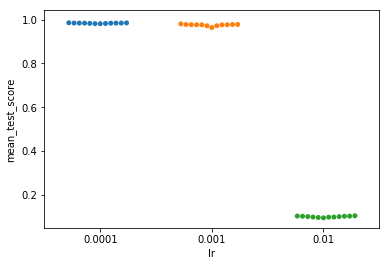

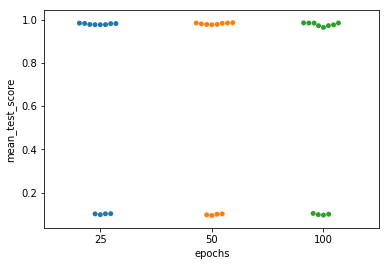

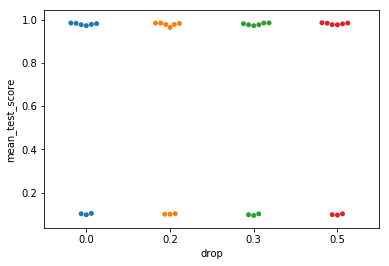

In [154]:
score = pd.DataFrame(grid_results.cv_results_).sort_values(by='mean_test_score', ascending = False)
parameters = grid_results.param_grid
for i in parameters.keys():
    print(i, len(parameters[i]), parameters[i])
score[i] = score.params.apply(lambda x: x[i])
l =['mean_test_score'] + list(parameters.keys())
for i in list(parameters.keys()):
    sns.swarmplot(data = score[l], x = i, y = 'mean_test_score')
    plt.savefig(i+'.jpg', dpi = 100)
    plt.show()

In [0]:
score["params"] = score["params"].map(lambda x: str(x))

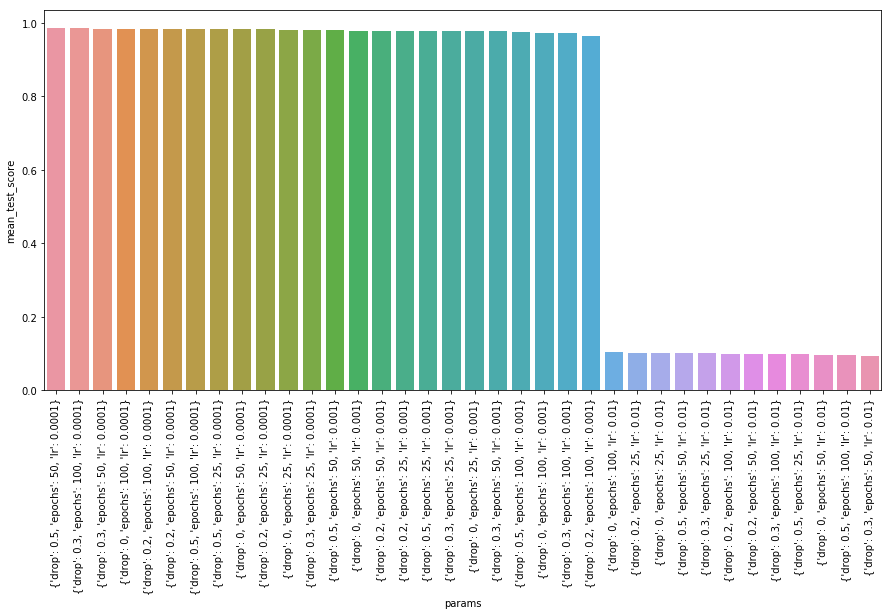

In [171]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="params",y="mean_test_score",data=score)
plt.xticks(rotation=90)
plt.savefig('barplot.png',dpi=100,bbox_inches='tight')

In [95]:
score[["lr","epochs","drop","mean_test_score"]]

,lr,epochs,drop,mean_test_score
32,0.0001,50,0.5,0.985583
26,0.0001,100,0.3,0.984933
23,0.0001,50,0.3,0.984267
8,0.0001,100,0.0,0.984217
17,0.0001,100,0.2,0.984033
14,0.0001,50,0.2,0.984017
35,0.0001,100,0.5,0.984000
29,0.0001,25,0.5,0.983567
5,0.0001,50,0.0,0.982933
11,0.0001,25,0.2,0.982217


## Tune Activation Function

In [0]:
#parameters
lr= [0.0001]
epochs=[50]
drop=[0.5]
act = [None,"tanh","sigmoid","relu"]
param_grid = dict(lr=lr,epochs=epochs,drop=drop,act=act)

In [97]:
grid2 = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, verbose=True)  #GridSearch with 1-fold Cross Validation
grid_result2 = grid2.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 33.8min finished


Epoch 1/50
60000/60000 [==============================] - 17s 275us/step - loss: 0.6916 - acc: 0.7877
Epoch 2/50
60000/60000 [==============================] - 15s 256us/step - loss: 0.2459 - acc: 0.9280
Epoch 3/50
60000/60000 [==============================] - 15s 255us/step - loss: 0.1762 - acc: 0.9498
Epoch 4/50
60000/60000 [==============================] - 15s 255us/step - loss: 0.1408 - acc: 0.9599
Epoch 5/50
60000/60000 [==============================] - 15s 254us/step - loss: 0.1195 - acc: 0.9661
Epoch 6/50
60000/60000 [==============================] - 15s 255us/step - loss: 0.1063 - acc: 0.9698
Epoch 7/50
60000/60000 [==============================] - 15s 258us/step - loss: 0.0942 - acc: 0.9730
Epoch 8/50
60000/60000 [==============================] - 15s 257us/step - loss: 0.0844 - acc: 0.9759
Epoch 9/50
60000/60000 [==============================] - 15s 254us/step - loss: 0.0766 - acc: 0.9783
Epoch 10/50
60000/60000 [==============================] - 15s 256us/step - loss: 

In [0]:
pickle.dump(grid_result2,open('actgrid.pkl','wb'))
!cp actgrid.pkl drive/My\ Drive

In [0]:
scores = pd.DataFrame(grid_result2.cv_results_).sort_values(by='mean_test_score', ascending = False)[["param_act","mean_test_score"]]
scores["param_act"] = scores["param_act"].map(lambda x: str(x) if x else "Linear")

(0.97, 1.0)

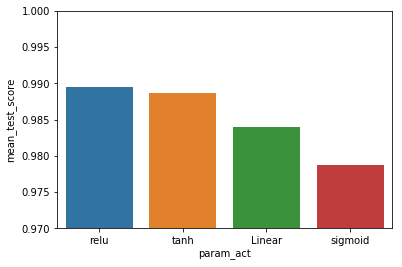

In [115]:
sns.barplot(x="param_act",y="mean_test_score",data=scores)
plt.ylim(0.97, 1.0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 15s 314us/step - loss: 0.5753 - acc: 0.8307 - val_loss: 0.2041 - val_acc: 0.9380
Epoch 2/50
48000/48000 [==============================] - 14s 283us/step - loss: 0.2147 - acc: 0.9367 - val_loss: 0.1241 - val_acc: 0.9641
Epoch 3/50
48000/48000 [==============================] - 13s 279us/step - loss: 0.1547 - acc: 0.9548 - val_loss: 0.0912 - val_acc: 0.9722
Epoch 4/50
48000/48000 [==============================] - 13s 278us/step - loss: 0.1270 - acc: 0.9629 - val_loss: 0.0796 - val_acc: 0.9750
Epoch 5/50
48000/48000 [==============================] - 13s 279us/step - loss: 0.1100 - acc: 0.9676 - val_loss: 0.0693 - val_acc: 0.9780
Epoch 6/50
48000/48000 [==============================] - 13s 279us/step - loss: 0.0963 - acc: 0.9711 - val_loss: 0.0685 - val_acc: 0.9791
Epoch 7/50
48000/48000 [==============================] - 13s 280us/step - loss: 0.0903 - acc: 0.9731 - val_loss: 0.

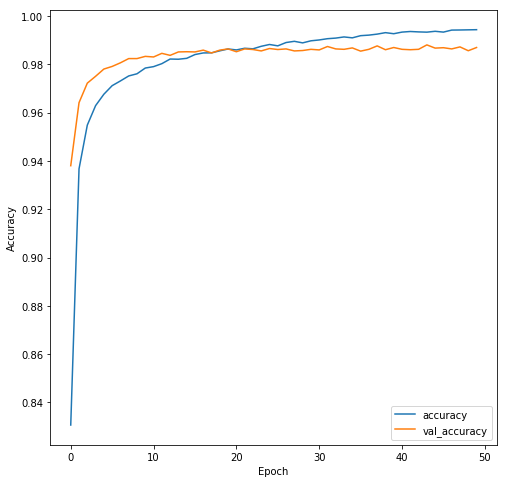

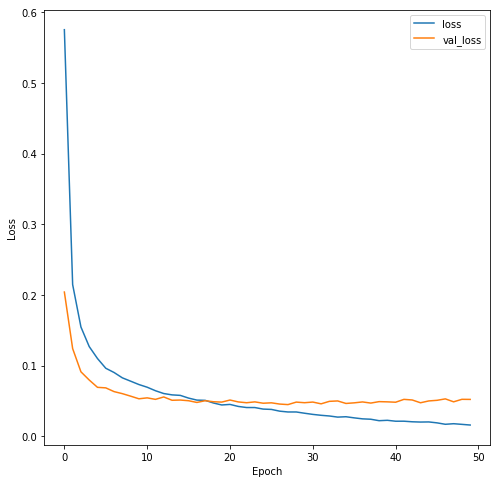

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 15s 319us/step - loss: 0.7696 - acc: 0.7592 - val_loss: 0.1841 - val_acc: 0.9460
Epoch 2/50
48000/48000 [==============================] - 14s 285us/step - loss: 0.2801 - acc: 0.9182 - val_loss: 0.1209 - val_acc: 0.9643
Epoch 3/50
48000/48000 [==============================] - 14s 285us/step - loss: 0.2075 - acc: 0.9390 - val_loss: 0.0994 - val_acc: 0.9693
Epoch 4/50
48000/48000 [==============================] - 14s 285us/step - loss: 0.1682 - acc: 0.9517 - val_loss: 0.0874 - val_acc: 0.9742
Epoch 5/50
48000/48000 [==============================] - 14s 294us/step - loss: 0.1465 - acc: 0.9570 - val_loss: 0.0736 - val_acc: 0.9772
Epoch 6/50
48000/48000 [==============================] - 14s 286us/step - loss: 0.1275 - acc: 0.9637 - val_loss: 0.0663 - val_acc: 0.9797
Epoch 7/50
48000/48000 [==============================] - 14s 285us/step - loss: 0.1140 - acc: 0.9672 - val_loss: 0.

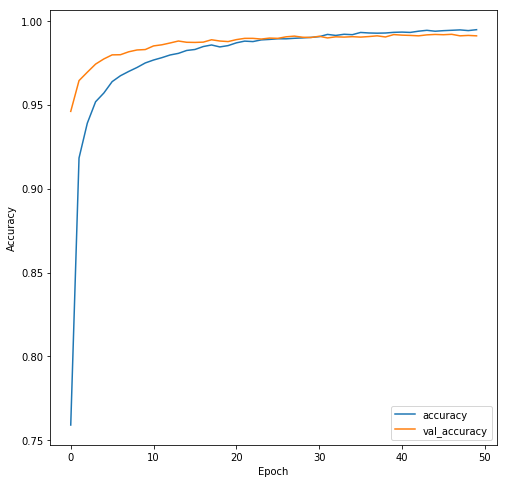

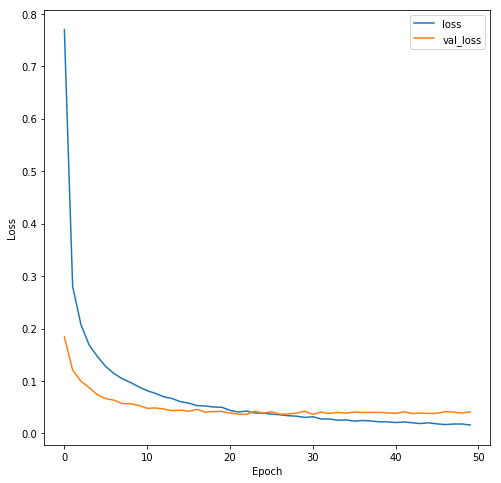

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 15s 322us/step - loss: 2.3186 - acc: 0.1054 - val_loss: 2.3018 - val_acc: 0.1122
Epoch 2/50
48000/48000 [==============================] - 14s 287us/step - loss: 2.3019 - acc: 0.1113 - val_loss: 2.3021 - val_acc: 0.1122
Epoch 3/50
48000/48000 [==============================] - 14s 287us/step - loss: 2.3015 - acc: 0.1118 - val_loss: 2.3008 - val_acc: 0.1122
Epoch 4/50
48000/48000 [==============================] - 14s 288us/step - loss: 1.6107 - acc: 0.4470 - val_loss: 0.8131 - val_acc: 0.8156
Epoch 5/50
48000/48000 [==============================] - 14s 285us/step - loss: 0.8149 - acc: 0.7651 - val_loss: 0.5449 - val_acc: 0.8681
Epoch 6/50
48000/48000 [==============================] - 14s 286us/step - loss: 0.6143 - acc: 0.8301 - val_loss: 0.4044 - val_acc: 0.8979
Epoch 7/50
48000/48000 [==============================] - 14s 285us/step - loss: 0.4979 - acc: 0.8632 - val_loss: 0.

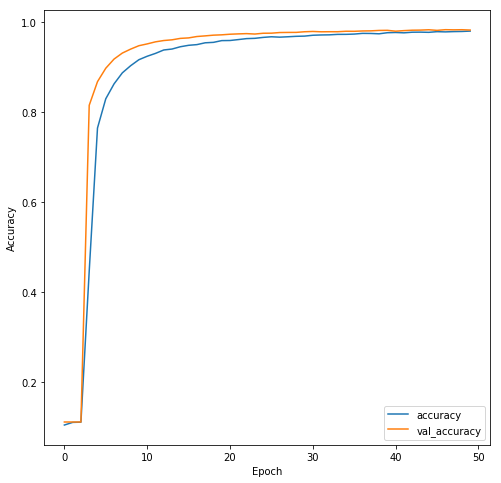

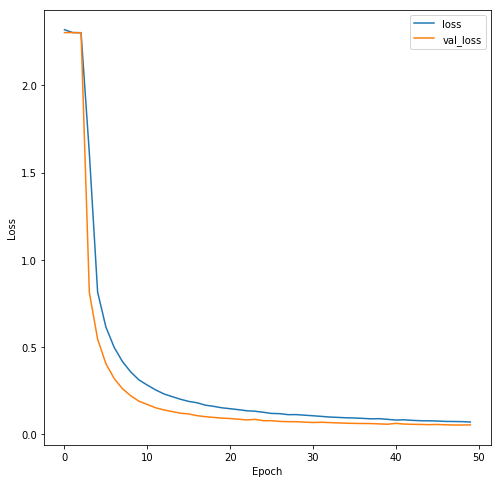

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 16s 324us/step - loss: 0.6029 - acc: 0.8369 - val_loss: 0.2008 - val_acc: 0.9479
Epoch 2/50
48000/48000 [==============================] - 14s 286us/step - loss: 0.2115 - acc: 0.9433 - val_loss: 0.1244 - val_acc: 0.9654
Epoch 3/50
48000/48000 [==============================] - 14s 283us/step - loss: 0.1449 - acc: 0.9601 - val_loss: 0.0915 - val_acc: 0.9738
Epoch 4/50
48000/48000 [==============================] - 14s 286us/step - loss: 0.1163 - acc: 0.9679 - val_loss: 0.0755 - val_acc: 0.9775
Epoch 5/50
48000/48000 [==============================] - 14s 283us/step - loss: 0.0980 - acc: 0.9724 - val_loss: 0.0685 - val_acc: 0.9785
Epoch 6/50
48000/48000 [==============================] - 14s 286us/step - loss: 0.0860 - acc: 0.9762 - val_loss: 0.0606 - val_acc: 0.9820
Epoch 7/50
48000/48000 [==============================] - 14s 287us/step - loss: 0.0755 - acc: 0.9787 - val_loss: 0.

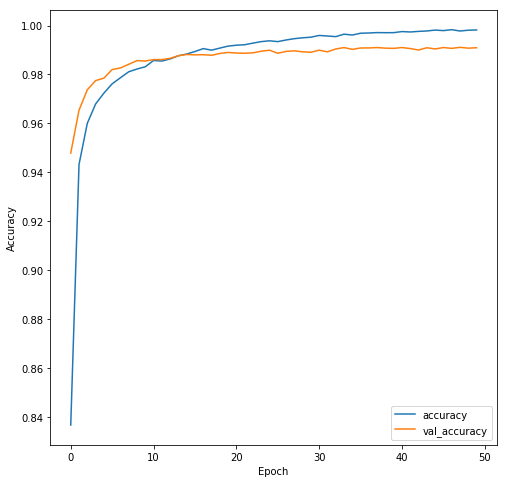

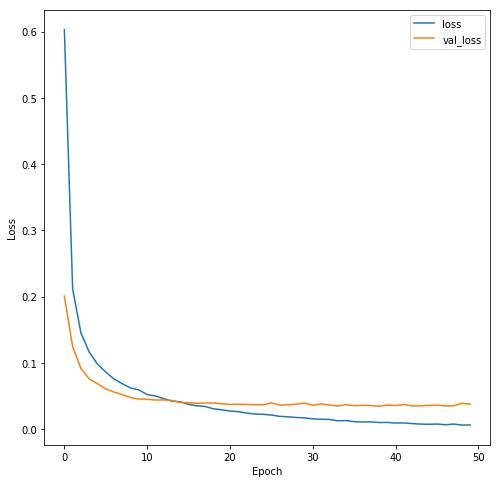

In [127]:
lr=0.0001 #learning rate for adam optimizer
epoch=50 #number of epochs to train
drop=0.5 #dropout
for act in [None,"relu","sigmoid","tanh"]:
  model = KerasClassifier(build_fn=create_model, epochs=epoch, act=act, lr=lr,drop=drop)
  history = model.fit(trainX,trainY, verbose=True, validation_data=(valX,valY))
  
  #Print Learning Curves
  plt.figure(figsize=(8,8))
  plt.plot(history.history['acc'], label='accuracy')
  plt.plot(history.history['val_acc'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()
  
  
  #Print Learning Curves
  plt.figure(figsize=(8,8))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.show()
  

# Final Model on Train+Validation and Best Parameters

In [0]:
#best parameters
act="relu" #activation
lr=0.0001 #learning rate for adam optimizer
epoch=50 #number of epochs to train
drop=0.5 #dropout

In [0]:
model = KerasClassifier(build_fn=create_model, epochs=epoch, act=act, lr=lr,drop=drop)

In [130]:
history = model.fit(X,y, verbose=True)

Epoch 1/50
60000/60000 [==============================] - 18s 293us/step - loss: 0.6463 - acc: 0.8026
Epoch 2/50
60000/60000 [==============================] - 16s 264us/step - loss: 0.2216 - acc: 0.9349
Epoch 3/50
60000/60000 [==============================] - 16s 270us/step - loss: 0.1612 - acc: 0.9532
Epoch 4/50
60000/60000 [==============================] - 16s 268us/step - loss: 0.1315 - acc: 0.9624
Epoch 5/50
60000/60000 [==============================] - 16s 266us/step - loss: 0.1118 - acc: 0.9683
Epoch 6/50
60000/60000 [==============================] - 16s 266us/step - loss: 0.0957 - acc: 0.9726
Epoch 7/50
60000/60000 [==============================] - 16s 266us/step - loss: 0.0846 - acc: 0.9763
Epoch 8/50
60000/60000 [==============================] - 16s 264us/step - loss: 0.0792 - acc: 0.9777
Epoch 9/50
60000/60000 [==============================] - 16s 265us/step - loss: 0.0718 - acc: 0.9796
Epoch 10/50
60000/60000 [==============================] - 16s 269us/step - loss: 

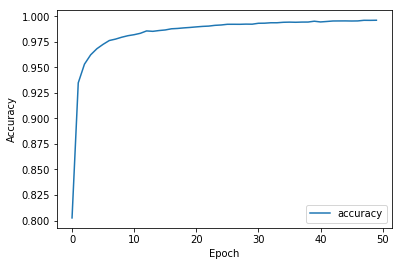

In [131]:
#Print Learning Curves
plt.plot(history.history['acc'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

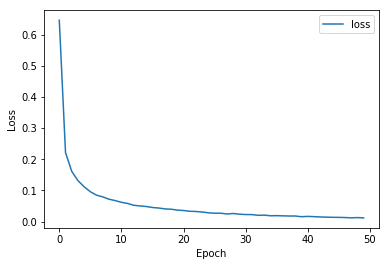

In [132]:
#Print Learning Curves
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [0]:
pred = pd.DataFrame(model.predict_proba(testX)).astype('int32')

In [0]:
pred.to_csv('mnist.csv',index=False, header=False)

In [0]:
!cp mnist.csv drive/My\ Drive

In [0]:
files.download('mnist.csv')

In [0]:
preds = model.predict(testX)

Confusion matrix, without normalization
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1129    1    1    0    0    1    0    3    0]
 [   1    0 1021    0    4    0    0    4    2    0]
 [   0    0    0 1004    0    5    0    0    1    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   2    0    0    2    0  884    1    1    1    1]
 [   2    1    0    0    1    1  953    0    0    0]
 [   0    3    4    0    1    0    0 1014    5    1]
 [   3    0    0    0    0    0    1    1  967    2]
 [   1    0    0    0   12    1    0    0   10  985]]


<Figure size 864x864 with 0 Axes>

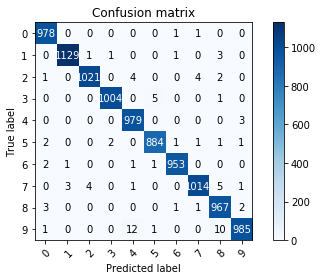

In [150]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plot_confusion_matrix(testY, preds, classes=[x for x in range(10)],
                      title='Confusion matrix')

In [152]:
accuracy_score(testY,preds)

0.9914

In [153]:
precision_recall_fscore_support(testY,preds)

(array([0.99, 1.  , 1.  , 1.  , 0.98, 0.99, 1.  , 0.99, 0.98, 0.99]),
 array([1.  , 0.99, 0.99, 0.99, 1.  , 0.99, 0.99, 0.99, 0.99, 0.98]),
 array([0.99, 1.  , 0.99, 1.  , 0.99, 0.99, 1.  , 0.99, 0.99, 0.98]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))